<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 28px; height: 77px"> 

# Anime Recommender System 
### *Preprocessing & EDA*
---

In [212]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### Reading in Data

In [213]:
anime = pd.read_csv('../datasets/anime.csv')

### Data Description

In [214]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [215]:
anime = anime[anime['members'] >= 10000]

### Check For Nulls

In [216]:
anime.isna().sum()

anime_id     0
name         0
genre        2
type         4
episodes     0
rating      43
members      0
dtype: int64

In [217]:
anime.dropna(inplace=True)

In [218]:
anime.isna().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

### Types of Anime

In [219]:
anime['type'].value_counts()

TV         1644
OVA         457
Movie       408
Special     355
ONA          70
Music        12
Name: type, dtype: int64

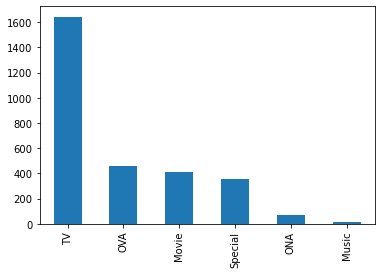

In [220]:
anime.type.value_counts().plot(kind = 'bar')
plt.savefig('../vizualizations/typecount');

### Top 10 Anime Genres

In [221]:
z=[]
for i,idx in anime.iterrows():
    y=[a for a in idx['genre'].strip().split(',')]
    z.extend(y)

In [222]:
genre_series=pd.Series(z)

In [223]:
genre_series.value_counts()[:10]

Action           1081
Comedy            965
 Romance          756
 Fantasy          684
 Shounen          680
 School           615
 Sci-Fi           606
 Supernatural     552
 Comedy           543
 Drama            482
dtype: int64

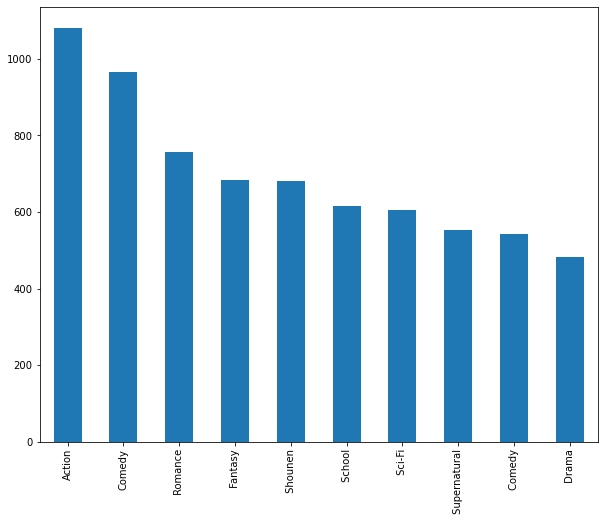

In [224]:
genre_series.value_counts()[:10].plot.bar(figsize=(10,8))
plt.ticklabel_format(axis='y', style='plain')
plt.savefig('../vizualizations/genrecount');

### Top 10 rated Anime

In [225]:
view = anime[['name', 'type', 'rating', 'members']]

In [226]:
view.sort_values(['rating'], ascending=False).head(10)

,name,type,rating,members
0,Kimi no Na wa.,Movie,9.37,200630
1,Fullmetal Alchemist: Brotherhood,TV,9.26,793665
2,Gintama°,TV,9.25,114262
3,Steins;Gate,TV,9.17,673572
4,Gintama&#039;,TV,9.16,151266
5,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,TV,9.15,93351
6,Hunter x Hunter (2011),TV,9.13,425855
7,Ginga Eiyuu Densetsu,OVA,9.11,80679
9,Gintama&#039;: Enchousen,TV,9.11,81109
8,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,Movie,9.10,72534


### Top 10 Watched Anime

In [227]:
view.sort_values(['members'], ascending=False).head(10)

,name,type,rating,members
40,Death Note,TV,8.71,1013917
86,Shingeki no Kyojin,TV,8.54,896229
804,Sword Art Online,TV,7.83,893100
1,Fullmetal Alchemist: Brotherhood,TV,9.26,793665
159,Angel Beats!,TV,8.39,717796
19,Code Geass: Hangyaku no Lelouch,TV,8.83,715151
841,Naruto,TV,7.81,683297
3,Steins;Gate,TV,9.17,673572
445,Mirai Nikki (TV),TV,8.07,657190
131,Toradora!,TV,8.45,633817


In [228]:
view.sort_values(['members'], ascending=False).head(10)

,name,type,rating,members
40,Death Note,TV,8.71,1013917
86,Shingeki no Kyojin,TV,8.54,896229
804,Sword Art Online,TV,7.83,893100
1,Fullmetal Alchemist: Brotherhood,TV,9.26,793665
159,Angel Beats!,TV,8.39,717796
19,Code Geass: Hangyaku no Lelouch,TV,8.83,715151
841,Naruto,TV,7.81,683297
3,Steins;Gate,TV,9.17,673572
445,Mirai Nikki (TV),TV,8.07,657190
131,Toradora!,TV,8.45,633817


### Top 10 Rated Anime Movie

In [229]:
topratedmovie = view.loc[(anime['type'] == 'Movie')]
topratedmovie.sort_values(['rating'], ascending=False).head(10)

,name,type,rating,members
0,Kimi no Na wa.,Movie,9.37,200630
8,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,Movie,9.10,72534
11,Koe no Katachi,Movie,9.05,102733
15,Sen to Chihiro no Kamikakushi,Movie,8.93,466254
18,Ookami Kodomo no Ame to Yuki,Movie,8.84,226193
24,Mononoke Hime,Movie,8.81,339556
25,Suzumiya Haruhi no Shoushitsu,Movie,8.81,240297
33,Mushishi Zoku Shou: Suzu no Shizuku,Movie,8.75,32266
35,Howl no Ugoku Shiro,Movie,8.74,333186
37,Kizumonogatari II: Nekketsu-hen,Movie,8.73,34347


### Top 10 Watched Anime Movie

In [230]:
topmoviewatch = view.loc[(anime['type'] == 'Movie')]
topmoviewatch.sort_values(['members'], ascending=False).head(10)

,name,type,rating,members
15,Sen to Chihiro no Kamikakushi,Movie,8.93,466254
24,Mononoke Hime,Movie,8.81,339556
35,Howl no Ugoku Shiro,Movie,8.74,333186
411,Byousoku 5 Centimeter,Movie,8.10,324035
132,Toki wo Kakeru Shoujo,Movie,8.44,289206
115,Tonari no Totoro,Movie,8.48,271484
25,Suzumiya Haruhi no Shoushitsu,Movie,8.81,240297
18,Ookami Kodomo no Ame to Yuki,Movie,8.84,226193
225,Summer Wars,Movie,8.30,223359
191,Ghost in the Shell,Movie,8.34,223036


### Top 10 Rated Anime TV shows

In [231]:
topratedtv = view.loc[(anime['type'] == 'TV')]
topratedtv.sort_values(['rating'], ascending=False).head(10)

,name,type,rating,members
1,Fullmetal Alchemist: Brotherhood,TV,9.26,793665
2,Gintama°,TV,9.25,114262
3,Steins;Gate,TV,9.17,673572
4,Gintama&#039;,TV,9.16,151266
5,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,TV,9.15,93351
6,Hunter x Hunter (2011),TV,9.13,425855
9,Gintama&#039;: Enchousen,TV,9.11,81109
10,Clannad: After Story,TV,9.06,456749
12,Gintama,TV,9.04,336376
13,Code Geass: Hangyaku no Lelouch R2,TV,8.98,572888


### Top 10 Watched Anime TV shows

In [232]:
toptvwatch = view.loc[(anime['type'] == 'TV')]
toptvwatch.sort_values(['members'], ascending=False).head(10)

,name,type,rating,members
40,Death Note,TV,8.71,1013917
86,Shingeki no Kyojin,TV,8.54,896229
804,Sword Art Online,TV,7.83,893100
1,Fullmetal Alchemist: Brotherhood,TV,9.26,793665
159,Angel Beats!,TV,8.39,717796
19,Code Geass: Hangyaku no Lelouch,TV,8.83,715151
841,Naruto,TV,7.81,683297
3,Steins;Gate,TV,9.17,673572
445,Mirai Nikki (TV),TV,8.07,657190
131,Toradora!,TV,8.45,633817


### Top 10 Rated Anime Originals

In [233]:
topratedona = view.loc[(anime['type'] == 'ONA')]
topratedona.sort_values(['rating'], ascending=False).head(10)

,name,type,rating,members
246,Eve no Jikan,ONA,8.26,99074
409,There She Is!!,ONA,8.11,13935
532,Mobile Suit Gundam Thunderbolt,ONA,8.00,14419
547,Hetalia: The Beautiful World,ONA,7.98,34960
589,Hetalia World Series,ONA,7.95,64416
808,Bounen no Xamdou,ONA,7.82,79026
915,Koyomimonogatari,ONA,7.77,45632
934,Hetalia Axis Powers,ONA,7.76,144898
997,Katekyo Hitman Reborn! Special,ONA,7.73,19991
1019,Noblesse: Awakening,ONA,7.72,28864


### Top 10 Watched Anime Originals

In [234]:
toponawatch = view.loc[(anime['type'] == 'ONA')]
toponawatch.sort_values(['members'], ascending=False).head(10)

,name,type,rating,members
934,Hetalia Axis Powers,ONA,7.76,144898
1145,Ore no Imouto ga Konnani Kawaii Wake ga Nai Sp...,ONA,7.66,101495
246,Eve no Jikan,ONA,8.26,99074
1911,Plastic Neesan,ONA,7.41,83977
808,Bounen no Xamdou,ONA,7.82,79026
4849,Ore no Imouto ga Konnani Kawaii Wake ga Nai. S...,ONA,6.62,70559
1217,Suzumiya Haruhi-chan no Yuuutsu,ONA,7.63,70416
3516,Bishoujo Senshi Sailor Moon Crystal,ONA,6.96,69702
589,Hetalia World Series,ONA,7.95,64416
2221,Chuunibyou demo Koi ga Shitai! Lite,ONA,7.32,60139


### Comparison Of Genres

In [235]:
genressplit = ''
for i in anime.genre:
    genresplit = genressplit + i.strip() + ','
    
genres=list(set(genressplit.replace(r' ','').split(',')))[1:] 

In [236]:
Num = []
Avg = []
Members = []

for z in genres:
    Num.append(anime.loc[anime.genre.str.contains(z)==True]['name'].count())
    Avg.append(anime.loc[anime.genre.str.contains(z)==True]['rating'].mean())
    Members.append(anime.loc[anime.genre.str.contains(z)==True]['members'].sum())

genres = pd.DataFrame({'Number':Num,'Average_Rating':Avg,'Total_members':Members},index=genres)
genres.dropna(inplace=True)
genres.sort_values('Number',ascending=False)
genres = Comparison_genre.iloc[1:]
genres.sort_values(['Total_members'], ascending=False).head(10) 


,Number,Average_Rating,Total_members
Comedy,1508,7.383422,100702347
Action,1081,7.443247,90684230
Romance,787,7.400330,63454054
Drama,723,7.599350,55146515
Fantasy,729,7.380631,53901393
School,630,7.373444,53254983
Shounen,724,7.564448,52347434
Adventure,607,7.478929,41956517
Sci-Fi,620,7.397581,41204141
Mystery,261,7.665517,26122731


In [237]:
genres = genres[genres['Total_members'] >= 25000000]

### Top Rated Anime for Top 10 genres

In [238]:
x = []
y = []

for i in genres.index:
    x.append(anime.loc[anime[anime.genre.str.contains(i)==True].rating.nlargest(10).index].name.values)
    y.append(anime.loc[anime[anime.genre.str.contains(i)==True].members.nlargest(10).index].name.values)
    
len(x)
top10rating=pd.DataFrame(x,index=genres.index,columns=np.arange(1,11)).T

In [239]:
top10rating

,Fantasy,Action,Adventure,Sci-Fi,School,Drama,Mystery,Romance,Comedy,Shounen
1,Fullmetal Alchemist: Brotherhood,Fullmetal Alchemist: Brotherhood,Fullmetal Alchemist: Brotherhood,Gintama°,Kimi no Na wa.,Kimi no Na wa.,Mushishi Zoku Shou 2nd Season,Kimi no Na wa.,Gintama°,Fullmetal Alchemist: Brotherhood
2,Clannad: After Story,Gintama°,Hunter x Hunter (2011),Steins;Gate,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,Fullmetal Alchemist: Brotherhood,Suzumiya Haruhi no Shoushitsu,Clannad: After Story,Gintama&#039;,Gintama°
3,Mushishi Zoku Shou 2nd Season,Gintama&#039;,Sen to Chihiro no Kamikakushi,Gintama&#039;,Koe no Katachi,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,Monogatari Series: Second Season,Shigatsu wa Kimi no Uso,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,Gintama&#039;
4,Ookami Kodomo no Ame to Yuki,Hunter x Hunter (2011),Mushishi Zoku Shou 2nd Season,Ginga Eiyuu Densetsu,Haikyuu!! Second Season,Ginga Eiyuu Densetsu,Mushishi Zoku Shou,Rurouni Kenshin: Meiji Kenkaku Romantan - Tsui...,Gintama&#039;: Enchousen,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...
5,Mononoke Hime,Gintama&#039;: Enchousen,Cowboy Bebop,Gintama&#039;: Enchousen,Shigatsu wa Kimi no Uso,Clannad: After Story,Mushishi,Suzumiya Haruhi no Shoushitsu,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,Hunter x Hunter (2011)
6,Mushishi Zoku Shou,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,Mononoke Hime,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,Code Geass: Hangyaku no Lelouch,Koe no Katachi,Mushishi Zoku Shou: Suzu no Shizuku,Monogatari Series: Second Season,Gintama,Gintama&#039;: Enchousen
7,Mushishi,Gintama,Mushishi Zoku Shou,Gintama,Suzumiya Haruhi no Shoushitsu,Code Geass: Hangyaku no Lelouch R2,Kizumonogatari II: Nekketsu-hen,Howl no Ugoku Shiro,Haikyuu!! Second Season,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...
8,Natsume Yuujinchou Go,Code Geass: Hangyaku no Lelouch R2,Mushishi,Code Geass: Hangyaku no Lelouch R2,Great Teacher Onizuka,Haikyuu!! Second Season,Monster,Bakuman. 3rd Season,Hajime no Ippo,Koe no Katachi
9,Mushishi Zoku Shou: Suzu no Shizuku,Code Geass: Hangyaku no Lelouch,Tengen Toppa Gurren Lagann,Code Geass: Hangyaku no Lelouch,Ansatsu Kyoushitsu (TV) 2nd Season,Sen to Chihiro no Kamikakushi,Death Note,Kara no Kyoukai 5: Mujun Rasen,Cowboy Bebop,Gintama
10,Natsume Yuujinchou Shi,Rurouni Kenshin: Meiji Kenkaku Romantan - Tsui...,Mushishi Zoku Shou: Suzu no Shizuku,Cowboy Bebop,Haikyuu!!,Shigatsu wa Kimi no Uso,Kara no Kyoukai 5: Mujun Rasen,Yojouhan Shinwa Taikei,One Punch Man,Haikyuu!! Second Season


### TOP Watched Anime for Top 10 genres

In [240]:
top10watch=pd.DataFrame(p,index=Comparison_genre.index,columns=np.arange(1,11)).T
top10watch

,Supernatural,Fantasy,Action,Adventure,Sci-Fi,School,Drama,Mystery,Romance,Comedy,Shounen
1,Death Note,Shingeki no Kyojin,Shingeki no Kyojin,Sword Art Online,Code Geass: Hangyaku no Lelouch,Angel Beats!,Shingeki no Kyojin,Death Note,Sword Art Online,Angel Beats!,Shingeki no Kyojin
2,Angel Beats!,Sword Art Online,Sword Art Online,Fullmetal Alchemist: Brotherhood,Steins;Gate,Code Geass: Hangyaku no Lelouch,Fullmetal Alchemist: Brotherhood,Mirai Nikki (TV),Toradora!,Naruto,Fullmetal Alchemist: Brotherhood
3,Mirai Nikki (TV),Fullmetal Alchemist: Brotherhood,Fullmetal Alchemist: Brotherhood,No Game No Life,Code Geass: Hangyaku no Lelouch R2,Toradora!,Angel Beats!,Tokyo Ghoul,Elfen Lied,Toradora!,Naruto
4,Bleach,No Game No Life,Angel Beats!,Fullmetal Alchemist,Tengen Toppa Gurren Lagann,Clannad,Elfen Lied,Durarara!!,Clannad,Bleach,Mirai Nikki (TV)
5,Elfen Lied,Fullmetal Alchemist,Code Geass: Hangyaku no Lelouch,Fairy Tail,One Punch Man,Another,Tokyo Ghoul,Another,Sword Art Online II,No Game No Life,Bleach
6,Tokyo Ghoul,Fairy Tail,Naruto,Soul Eater,Psycho-Pass,Kill la Kill,Fullmetal Alchemist,Bakemonogatari,Bakemonogatari,Fullmetal Alchemist,Fullmetal Alchemist
7,No Game No Life,Ao no Exorcist,Mirai Nikki (TV),Tengen Toppa Gurren Lagann,Cowboy Bebop,Suzumiya Haruhi no Yuuutsu,Code Geass: Hangyaku no Lelouch R2,Darker than Black: Kuro no Keiyakusha,Clannad: After Story,Fairy Tail,Fairy Tail
8,Ao no Exorcist,Soul Eater,Bleach,Sword Art Online II,Neon Genesis Evangelion,Ouran Koukou Host Club,Clannad,Suzumiya Haruhi no Yuuutsu,Ouran Koukou Host Club,Soul Eater,Ao no Exorcist
9,Soul Eater,Sword Art Online II,Elfen Lied,Noragami,Guilty Crown,Shigatsu wa Kimi no Uso,One Piece,Tokyo Ghoul √A,Shigatsu wa Kimi no Uso,Clannad,Soul Eater
10,Clannad,One Piece,Tokyo Ghoul,One Piece,Deadman Wonderland,High School DxD,Cowboy Bebop,Boku dake ga Inai Machi,Hataraku Maou-sama!,Tengen Toppa Gurren Lagann,Naruto: Shippuuden
